# figure out how to random crop the data

In [ ]:
from torchvision import datasets
import torch, torch.nn as nn, torch.optim as optim
import torchvision
data_path = '/content/drive/MyDrive'
transform = torchvision.transforms.RandomCrop(28, padding=0, pad_if_needed=True)

cifar10 = datasets.CIFAR10(data_path, train = True, download = True, transform = transform)

Files already downloaded and verified


In [ ]:
cifar10_val = datasets.CIFAR10(data_path, train = False, download = True,transform = transform)

Files already downloaded and verified


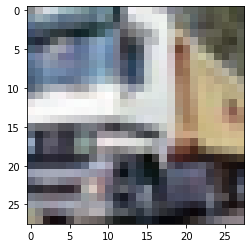

In [ ]:
from matplotlib import pyplot as plt
img, _ = cifar10[1]
plt.imshow(img)
plt.show()

In [ ]:
img.size

(28, 28)

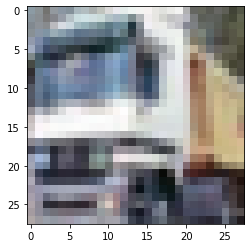

In [ ]:
img, _ = cifar10[1]
plt.imshow(img)
plt.show()

In [ ]:
img.size

(28, 28)

# 首先计算原始图像的均值和方差，并归一化

In [ ]:
from torchvision import transforms
to_tensor = transforms.ToTensor()

In [ ]:
pic = torch.stack([to_tensor(img) for img, _ in cifar10 ], dim=3)

In [ ]:
mean=pic.view(3, -1).mean(-1)

In [ ]:
std=pic.view(3, -1).std(-1)

In [ ]:
transformed_cifar10 = datasets.CIFAR10(data_path, train=True, download=True,
  transform = transforms.Compose(
      [ transform,
       to_tensor,
       transforms.Normalize(mean, std)
      ]
  )                                       
                                       )

Files already downloaded and verified


In [ ]:
transformed_cifar10_val = datasets.CIFAR10(data_path, train=False, download=True,
  transform = transforms.Compose(
      [ transform,
       to_tensor,
       transforms.Normalize(mean, std)
      ]
  )                                       
                                       )

Files already downloaded and verified


In [ ]:
img,_=transformed_cifar10[0]
img.shape

torch.Size([3, 28, 28])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


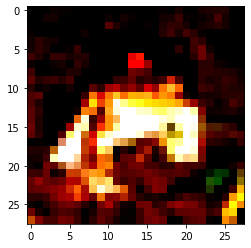

In [ ]:
plt.imshow(img.permute(1, 2, 0))
plt.show()

# 构建CIFAR2

In [ ]:
label_map = {0:0, 2:1}

class_names = ['birds', 'airplane']

cifar2 = [(img, label_map[label]) for img, label in transformed_cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in transformed_cifar10_val if label in [0, 2]]

In [ ]:
len(cifar2),len(cifar2_val)

(10000, 2000)

In [ ]:
img, _ = cifar2[0]
img.shape

torch.Size([3, 28, 28])

# 定义数据导入器、模型、优化器、损失函数

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size = 64, shuffle=True)


In [ ]:
model = nn.Sequential(
    nn.Linear(2352, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
)

In [ ]:
lr = 1e-2
optimizer = optim.SGD(model.parameters(), lr)


In [ ]:
loss_fn = nn.MSELoss()

# 学习集和验证集

In [ ]:
n_epoches = 100
a = torch.tensor([0.0, 1.0])
b = torch.tensor([1.0, 0.0])
for epoch in range(n_epoches):
  for imgs, lables in train_loader:
    loss = 0.0
    batch_size = imgs.shape[0]
    out = model(imgs.view(batch_size, -1))
    loss += loss_fn(out, a)
    loss += loss_fn(out, b)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print("Epoch %d, Loss:%f"%(epoch, float(loss)))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([64, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([16, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Loss:1.152979
Epoch 1, Loss:1.080210
Epoch 2, Loss:0.990242
Epoch 3, Loss:1.059869
Epoch 4, Loss:1.182734
Epoch 5, Loss:1.012758
Epoch 6, Loss:1.023555
Epoch 7, Loss:1.052945
Epoch 8, Loss:1.123401
Epoch 9, Loss:1.288525
Epoch 10, Loss:1.209091
Epoch 11, Loss:1.385974
Epoch 12, Loss:1.136779
Epoch 13, Loss:1.203465
Epoch 14, Loss:0.992751
Epoch 15, Loss:1.163740
Epoch 16, Loss:0.983030
Epoch 17, Loss:1.084740
Epoch 18, Loss:0.990712
Epoch 19, Loss:1.115633
Epoch 20, Loss:1.050762
Epoch 21, Loss:0.979805
Epoch 22, Loss:1.143179
Epoch 23, Loss:1.058791
Epoch 24, Loss:1.117580
Epoch 25, Loss:1.102584
Epoch 26, Loss:1.257872
Epoch 27, Loss:1.089466
Epoch 28, Loss:0.918877
Epoch 29, Loss:1.105518
Epoch 30, Loss:1.215267
Epoch 31, Loss:1.133924
Epoch 32, Loss:1.072125
Epoch 33, Loss:1.027214
Epoch 34, Loss:1.027298
Epoch 35, Loss:1.098343
Epoch 36, Loss:0.984201
Epoch 37, Loss:1.022129
Epoch 38, Loss:1.085498
Epoch 39, Loss:1.080300
Epoch 40, Loss:1.152865
Epoch 41, Loss:1.147302
Ep

In [ ]:
total, correct =0, 0

with torch.no_grad():
  for imgs, labels in val_loader:
    batch_size = imgs.shape[0]
    out = model(imgs.view(batch_size, -1))
    _, predict = torch.max(out, dim=1)
    total+=batch_size
    correct += int((predict == labels).sum())

print('accuracy %f', correct/total)

accuracy %f 0.6525
